In [1]:
import os
from pymongo import MongoClient
%matplotlib inline

# Open MongoDBB

In [2]:
year = 2017

In [3]:
uri = "mongodb://mongo/tweets"
client = MongoClient(uri)

print( 'List of databases in MongoDB:' )
print(client.list_database_names())

# database
db = client['irs990']

# collection
dbYear = db['%s' % year]

List of databases in MongoDB:
['admin', 'config', 'irs990', 'local']


# Filter IRS Forms w/no Website

In [4]:
dbYear.delete_many({ 'WebsiteAddressTxt' : 'N/A' })

# Feature Analysis

In [5]:
from bson.code import Code

In [6]:
map = Code("function() {"
    "for (var key in this) { emit(key, 1); }"
  "}");

reduce = Code("function(key, stuff) { var sum=0;for(var i in stuff) sum += stuff[i];"
     "return sum;}");

result = dbYear.map_reduce(map, reduce, "myresults")

In [7]:
d = {}
for doc in result.find():
    d[doc['_id']]= doc['value']
    
v_sorted = [d[key] for key in sorted(d, key=d.get, reverse=True)]
k_sorted = [key for key in sorted(d, key=d.get, reverse=True)]

The top aprox 150 Fields are rather consistent across the Collection

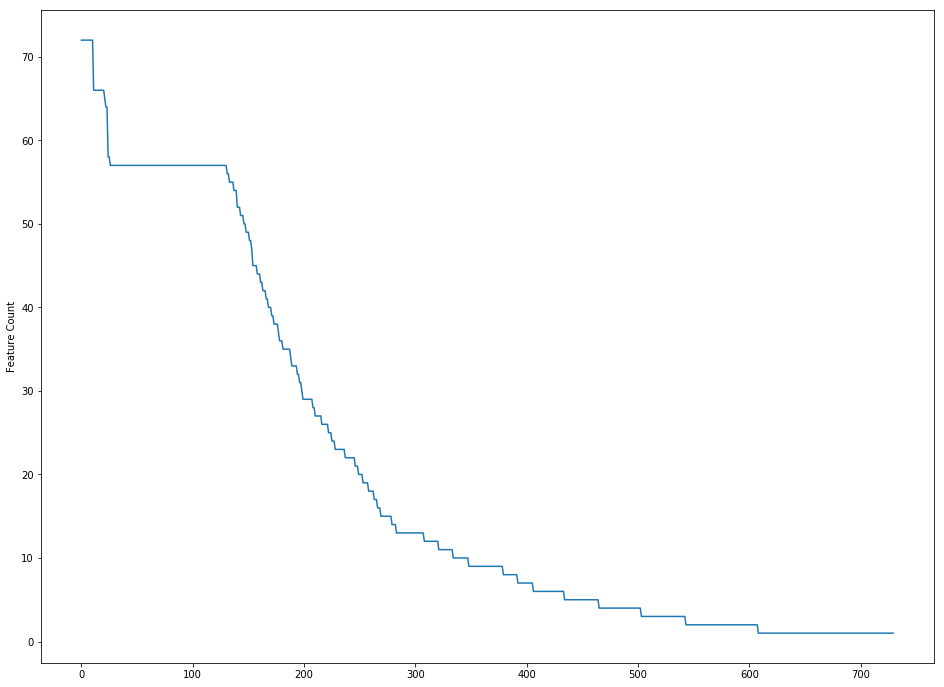

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(16, 12))
plt.plot(v_sorted)
plt.ylabel("Feature Count")
plt.show()

In [9]:
top50 = k_sorted[:50]

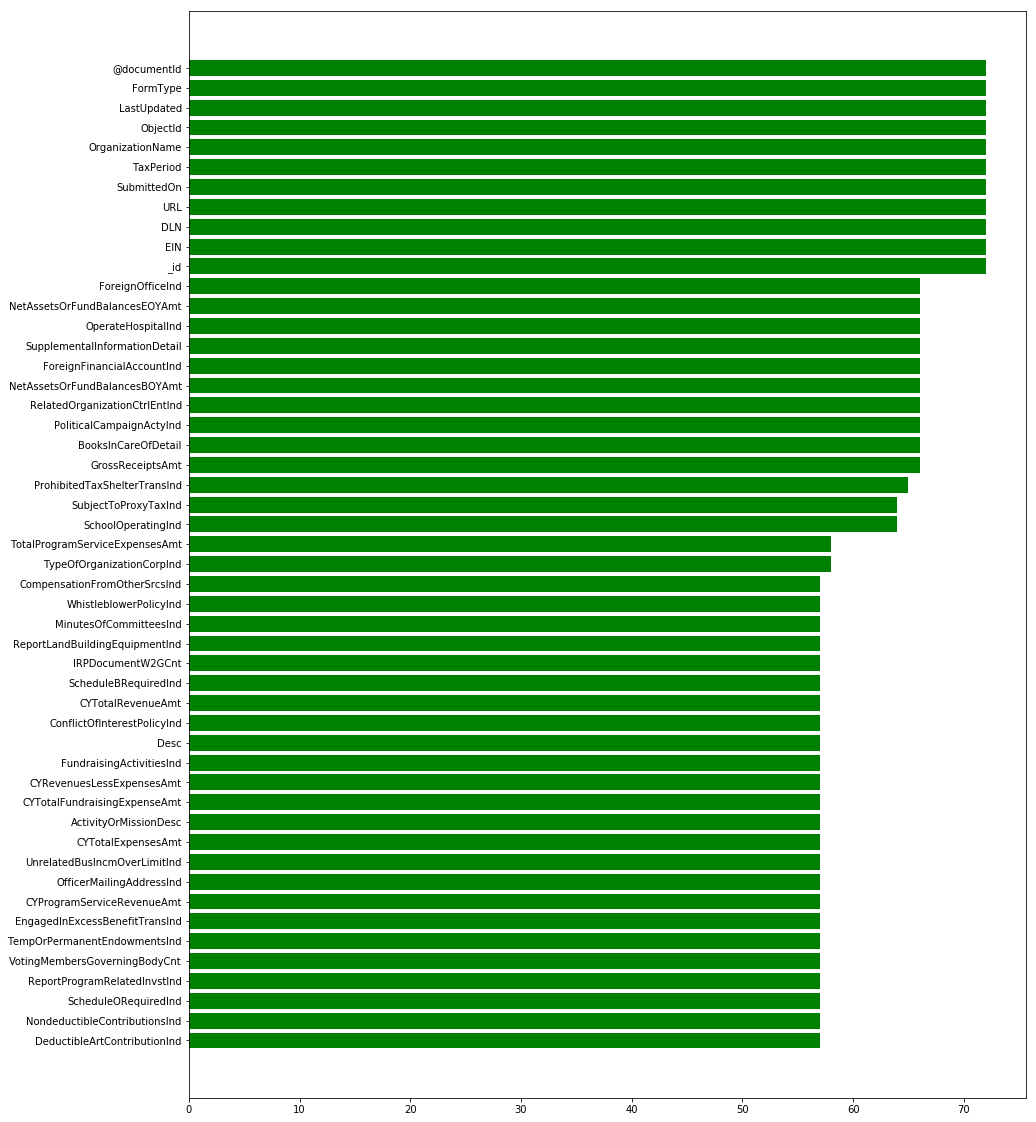

In [10]:
figure(figsize=(15, 20))
pos = np.arange(len(top50))
ax = plt.axes()
ax.invert_yaxis()  # labels read top-to-bottom
plt.barh(top50, v_sorted[:50], color='g',align='center')
plt.show()